In [2]:
import tensorflow as tf

In [17]:

# y = Wx + b
W = tf.Variable([2.5, 4.0], tf.float32, name='var_W')

x = tf.placeholder(tf.float32, name='x')
b = tf.Variable([5.0, 10.0], tf.float32, name='var_b')

y = W * x + b

# Initialize all variables defined
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    print( "Final result: Wx + b = ", sess.run(y, feed_dict={x: [10, 100]}))


Final result: Wx + b =  [ 30. 410.]


In [21]:
s = W * x

# Initialize only those variables that you might need
init = tf.variables_initializer([W])

with tf.Session() as sess:
    sess.run(init)

    #print "Will this work?: Wx + b = ", sess.run(y, feed_dict={x: [10, 100]})
    print( "Result: Wx = ", sess.run(s, feed_dict={x: [10, 100]}))


Result: Wx =  [ 25. 400.]


In [23]:

number = tf.Variable(2)
multiplier = tf.Variable(1)

init = tf.global_variables_initializer()
#assigning the variables so that to keep updating
result = number.assign(tf.multiply(number, multiplier))

with tf.Session() as sess:
    sess.run(init)

    for i in range(10):
        print ("Result number * multiplier = ", sess.run(result))
        print ("Increment multiplier, new value = ", sess.run(multiplier.assign_add(1)))


Result number * multiplier =  2
Increment multiplier, new value =  2
Result number * multiplier =  4
Increment multiplier, new value =  3
Result number * multiplier =  12
Increment multiplier, new value =  4
Result number * multiplier =  48
Increment multiplier, new value =  5
Result number * multiplier =  240
Increment multiplier, new value =  6
Result number * multiplier =  1440
Increment multiplier, new value =  7
Result number * multiplier =  10080
Increment multiplier, new value =  8
Result number * multiplier =  80640
Increment multiplier, new value =  9
Result number * multiplier =  725760
Increment multiplier, new value =  10
Result number * multiplier =  7257600
Increment multiplier, new value =  11


# Image work 

Image shape:  (512, 512, 3)
Image array:  [[[26 42 55]
  [27 43 56]
  [28 44 57]
  ...
  [26 44 56]
  [25 43 55]
  [25 43 55]]

 [[25 41 54]
  [27 43 56]
  [27 43 56]
  ...
  [25 43 55]
  [25 43 55]
  [25 43 55]]

 [[25 41 54]
  [26 42 55]
  [26 42 55]
  ...
  [25 43 55]
  [24 42 54]
  [24 42 54]]

 ...

 [[ 5  6  8]
  [ 5  6  8]
  [ 5  6  8]
  ...
  [ 5  7  6]
  [ 5  7  6]
  [ 5  7  6]]

 [[ 5  6 10]
  [ 5  6 10]
  [ 5  6 10]
  ...
  [ 5  7  6]
  [ 5  7  6]
  [ 5  7  6]]

 [[ 5  6 10]
  [ 5  6 10]
  [ 5  6 10]
  ...
  [ 5  7  6]
  [ 5  7  6]
  [ 5  7  6]]]


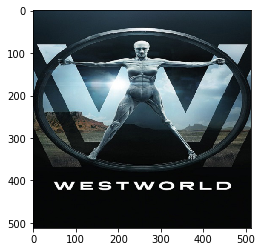

Transposed image shape:  (512, 512, 3)


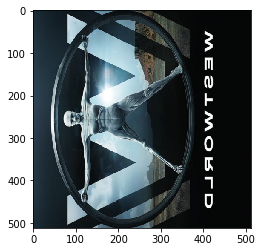

In [26]:
import tensorflow as tf
import matplotlib.image as mp_img
import matplotlib.pyplot as plot
import os

filename = "test.JPG"

image = mp_img.imread(filename)

print( "Image shape: ", image.shape)
print ("Image array: ", image)

plot.imshow(image)
plot.show()

x = tf.Variable(image, name='x')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    transpose = tf.image.transpose_image(x)

    result = sess.run(transpose)

    print( "Transposed image shape: ", result.shape)
    plot.imshow(result)
    plot.show()


In [ ]:
import tensorflow as tf

from PIL import Image

original_image_list = ["test.jpg", 
                       "./images/pexels-photo-28452.jpg",
                       "./images/black-and-white-branches-tree-high.jpg",
                       "./images/lost-places-old-decay-ruin-162389.jpeg"]

# Make a queue of file names including all the images specified.
filename_queue = tf.train.string_input_producer(original_image_list)

# Read an entire image file.
image_reader = tf.WholeFileReader()

with tf.Session() as sess:
    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    image_list = [];
    for i in range(len(original_image_list)):
        # Read a whole file from the queue, the first returned value in the tuple is the
        # filename which we are ignoring.
        _, image_file = image_reader.read(filename_queue)

        # Decode the image as a JPEG file, this will turn it into a Tensor which we can
        # then use in training.
        image = tf.image.decode_jpeg(image_file)

        # Get a tensor of resized images.
        image = tf.image.resize_images(image, [224, 224])
        image.set_shape((224, 224, 3))

        # Get an image tensor and print its value.
        image_array = sess.run(image)
        print image_array.shape

        Image.fromarray(image_array.astype('uint8'), 'RGB').show()

        # The expand_dims adds a new dimension
        image_list.append(tf.expand_dims(image_array, 0))

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)

    index = 0

    # Write image summary
    summary_writer = tf.summary.FileWriter('./m4_example2', graph=sess.graph)

    for image_tensor in image_list:
        summary_str = sess.run(tf.summary.image("image-" + str(index), image_tensor))
        summary_writer.add_summary(summary_str)
        index += 1

    summary_writer.close()




In [83]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [84]:
num_house=160

np.random.seed(28)
house_size= np.random.randint(low=1000,high=3500,size=num_house)

In [85]:

np.random.seed(28)
house_price= house_size*100 + np.random.randint(low=20000,high=80000,size=num_house)

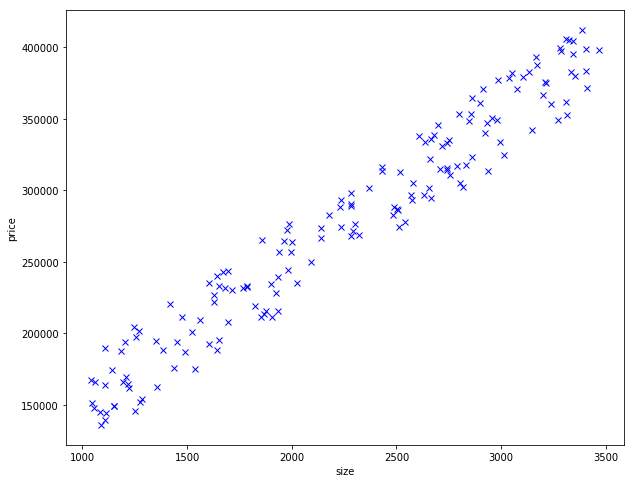

In [86]:
plt.plot(house_size,house_price,"bx")
plt.xlabel("size")
plt.ylabel("price")

In [87]:
num_train_samples =math.floor(num_house*0.7)

In [88]:
def normalize(array):
    return (array-array.mean())/array.std()

In [89]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

In [90]:
train_house_size_norm=normalize(train_house_size)
train_price_norm=normalize(train_price)

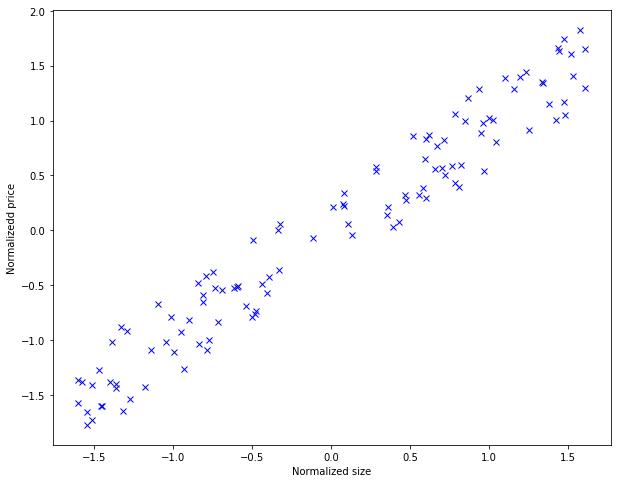

In [91]:
plt.plot(train_house_size_norm,train_price_norm,"bx")
plt.xlabel("Normalized size")
plt.ylabel("Normalizedd price")

In [92]:
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asarray(house_price[num_train_samples:])


In [93]:
test_house_size_norm=normalize(test_house_size)
test_price_norm=normalize(test_house_price)

In [94]:
#settin up hyr placeholders
tf_house_size=tf.placeholder("float",name="house_size")
tf_price=tf.placeholder("float",name="price")

In [95]:
tf_size_factor=tf.Variable(np.random.randn(),name="size_factor")
tf_price_offset=tf.Variable(np.random.randn(),name="price_offset")

In [96]:
tf_price_pred=tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)
tf_cost=tf.reduce_sum(tf.pow(tf_price_pred-tf_price,2))/(2*num_train_samples)
learning_rate=0.1
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

iteration #: 0002 cost= 3.376841545 size_factor= -1.5927109 price_offset= -0.34634942
iteration #: 0004 cost= 2.271548748 size_factor= -1.1272879 price_offset= -0.28342262
iteration #: 0006 cost= 1.530993819 size_factor= -0.74632186 price_offset= -0.23190966
iteration #: 0008 cost= 1.034816504 size_factor= -0.43448725 price_offset= -0.18974042
iteration #: 0010 cost= 0.702373683 size_factor= -0.17923926 price_offset= -0.15522
iteration #: 0012 cost= 0.479633898 size_factor= 0.029690664 price_offset= -0.12696126
iteration #: 0014 cost= 0.330395907 size_factor= 0.20070751 price_offset= -0.103828244
iteration #: 0016 cost= 0.230404735 size_factor= 0.34069106 price_offset= -0.08489115
iteration #: 0018 cost= 0.163409397 size_factor= 0.45527264 price_offset= -0.06938906
iteration #: 0020 cost= 0.118521489 size_factor= 0.54906195 price_offset= -0.056698825
iteration #: 0022 cost= 0.088445850 size_factor= 0.62583184 price_offset= -0.04631043
iteration #: 0024 cost= 0.068294518 size_factor= 0.

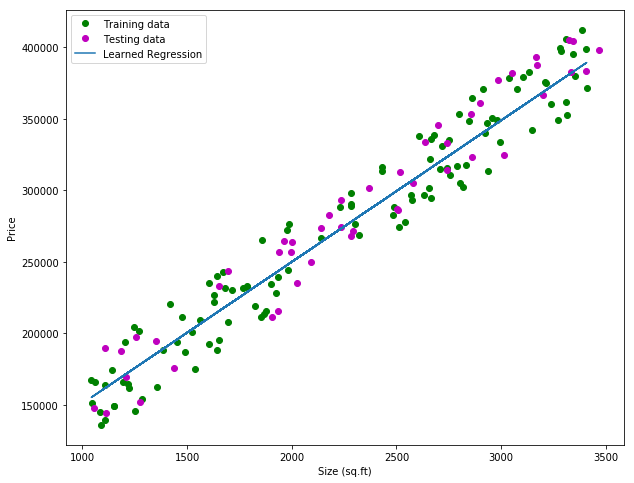

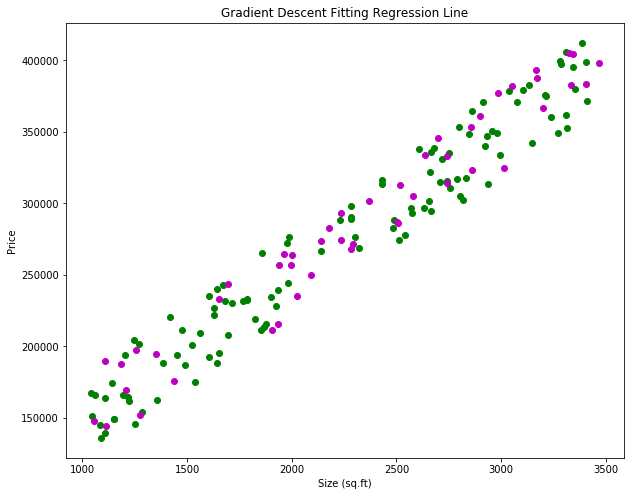

In [97]:
init =tf.global_variables_initializer()

# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

    # calculate the number of lines to animation
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0    

   # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            # Save the fit size_factor and price_offset to allow animation of learning process
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')


   # Plot of training and test data, and learned regression
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()



    # 
    # Plot another graph that animation of how Gradient Descent sequentually adjusted size_factor and price_offset to 
    # find the values that returned the "best" fit line.
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)

    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')

    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
        return line,
 
     # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=4000, blit=True)

    plt.show()   
